# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# parmeters

In [2]:
wavelength = 10.6e-6  # CO2 laser wavelength in meters (10.6 µm)
k = 2 * np.pi / wavelength  # Wave number
screen_size = 500
x = np.linspace(-0.01, 0.01, screen_size)
y = np.linspace(-0.01, 0.01, screen_size)
X, Y = np.meshgrid(x, y)
tilt_angle = 0.001  # Mirror tilt angle for straight fringes in radians

# Fringe Pattern

In [3]:
def generate_fringe_pattern(mirror_displacement, tilt=True):
    # Optical Path Difference
    OPD = 2 * mirror_displacement

    # Phase difference
    if tilt:
        phase_difference = k * (OPD + X * np.sin(tilt_angle))
    else:
        r = np.sqrt(X**2 + Y**2)  # Radial distance from center
        phase_difference = k * (OPD + r**2 / (2 * 0.1))  # 0.1 is arbitrary curvature

    # Intensity calculation (I1 = I2 = I0)
    I0 = 1.0  # Normalized intensity
    intensity_pattern = 2 * I0 * (1 + np.cos(phase_difference))

    return intensity_pattern

# Simulation-1: Basic fringe pattern

Running Basic fringe pattern simulation...


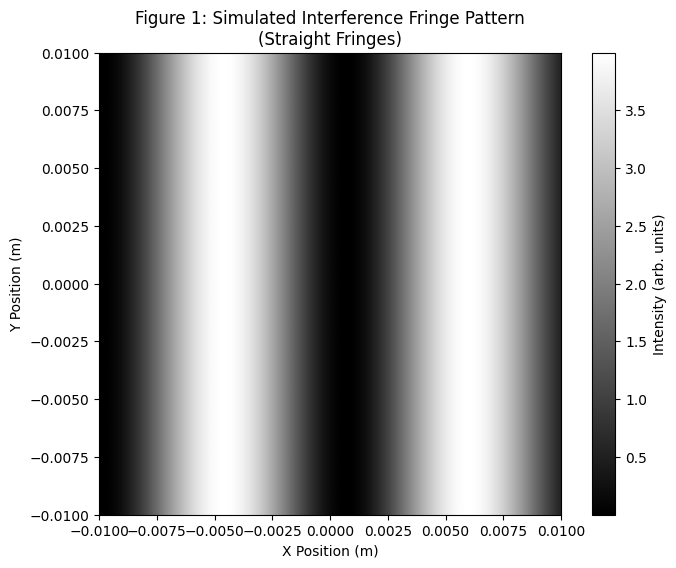

In [4]:
print("Running Basic fringe pattern simulation...")
initial_displacement = 50e-6  # 50 µm initial OPD
fringe_pattern = generate_fringe_pattern(initial_displacement, tilt=True)

plt.figure(figsize=(8, 6))
plt.imshow(fringe_pattern, cmap='gray', extent=[-0.01, 0.01, -0.01, 0.01])
plt.colorbar(label='Intensity (arb. units)')
plt.title('Figure 1: Simulated Interference Fringe Pattern\n(Straight Fringes)')
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.savefig('figure1_fringe_pattern.png', dpi=300, bbox_inches='tight')
plt.show()

# Simulation-2: Fringe shifts with mirror displacement

Running fringe shifts sumulations...


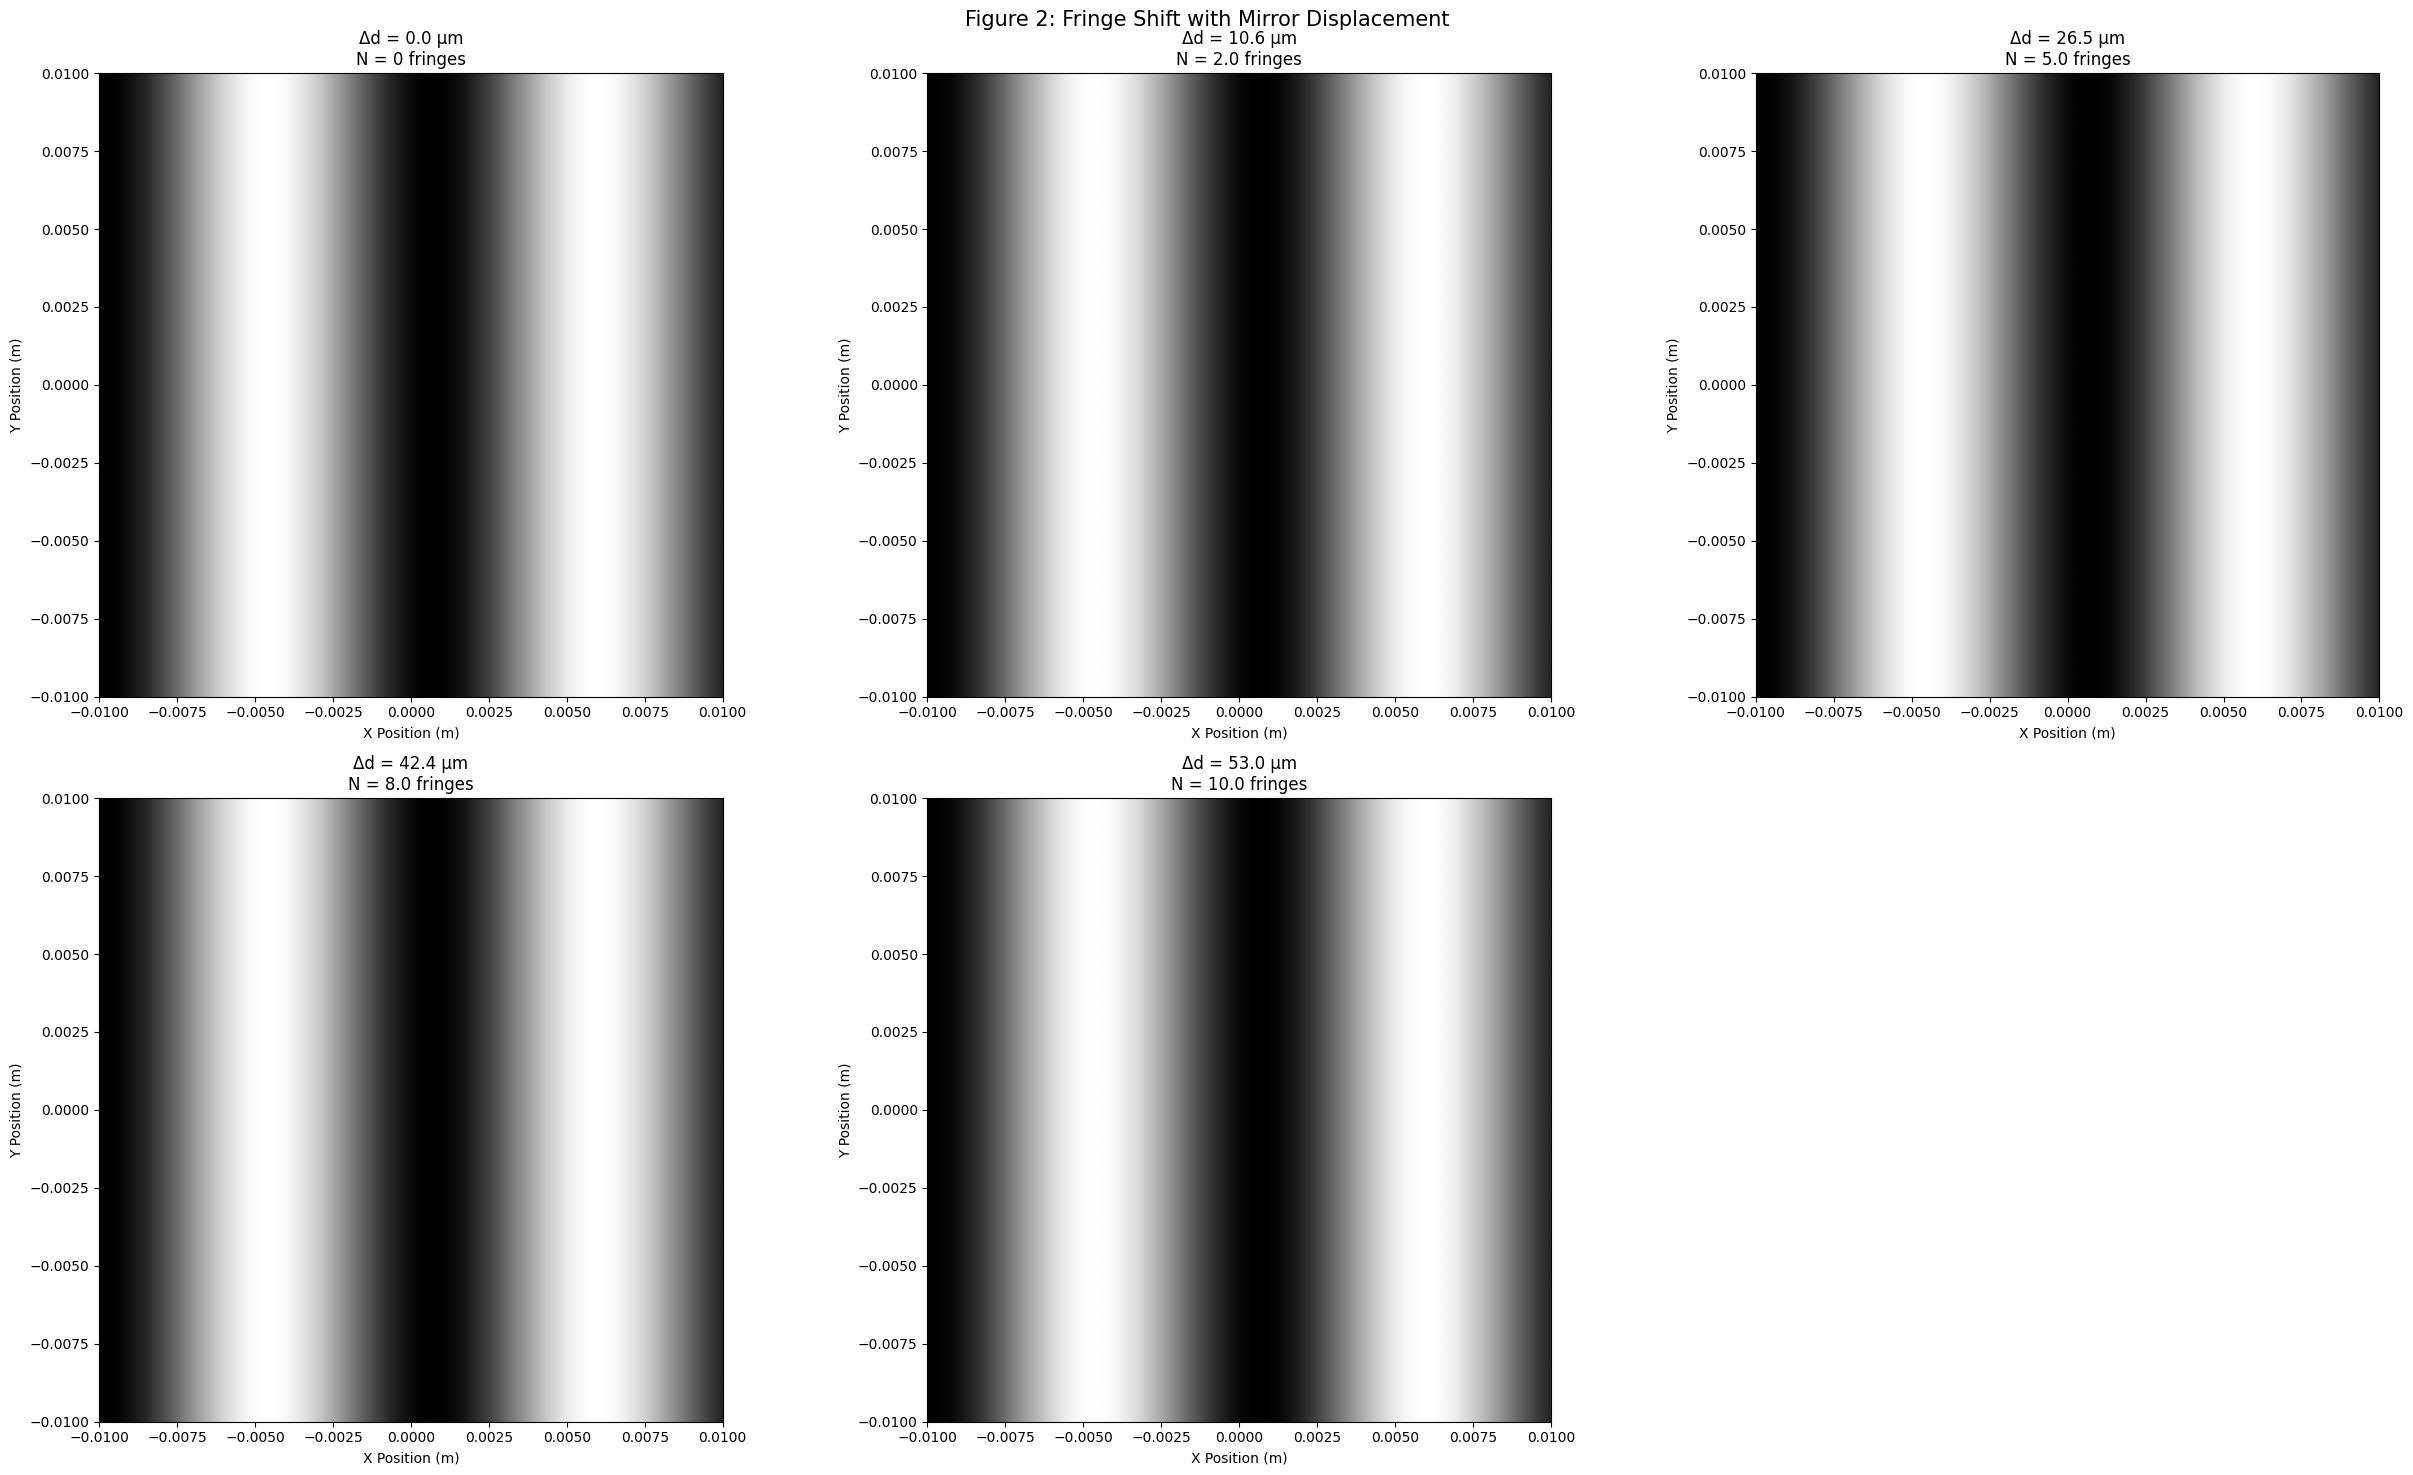

In [5]:
print("Running fringe shifts sumulations...")
displacements = [0, 10.6e-6, 26.5e-6, 42.4e-6, 53.0e-6]  # Mirror displacements to test (from Table 1)
expected_fringes = [0, 2.0, 5.0, 8.0, 10.0]  # Expected fringe shifts

# demonstrating fringe shifts
fig, axes = plt.subplots(2, 3, figsize=(25, 15))
axes = axes.ravel()

for i, (disp, expected_N) in enumerate(zip(displacements, expected_fringes)):
    pattern = generate_fringe_pattern(initial_displacement + disp, tilt=True)

    axes[i].imshow(pattern, cmap='gray', extent=[-0.01, 0.01, -0.01, 0.01])
    axes[i].set_title(f'Δd = {disp*1e6:.1f} µm\nN = {expected_N} fringes')
    axes[i].set_xlabel('X Position (m)')
    axes[i].set_ylabel('Y Position (m)')

for i in range(len(displacements), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle('Figure 2: Fringe Shift with Mirror Displacement', fontsize=15)
plt.tight_layout()
plt.savefig('figure2_fringe_shifts.png', dpi=300, bbox_inches='tight')
plt.show()

# Simulation-3: Wavelength estimation

Running Wavelength estimation...
Slope from linear fit (Δd/N): 5.30 µm/fringe
Estimated wavelength: 10.60 µm
Actual wavelength: 10.60 µm
Error: 0.00 µm


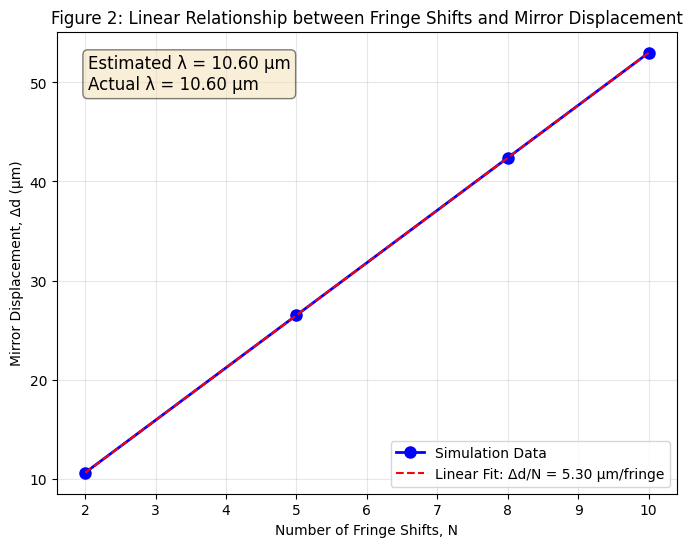

In [6]:
print("Running Wavelength estimation...")
displacement_values = np.array([10.6e-6, 26.5e-6, 42.4e-6, 53.0e-6])
fringe_counts = np.array([2.0, 5.0, 8.0, 10.0])
estimated_wavelengths = 2 * displacement_values / fringe_counts # estimated wavelength

# Linear regression for slope (Δd/N)
slope, intercept = np.polyfit(fringe_counts, displacement_values, 1)
wavelength_from_slope = 2 * slope

print(f"Slope from linear fit (Δd/N): {slope*1e6:.2f} µm/fringe")
print(f"Estimated wavelength: {wavelength_from_slope*1e6:.2f} µm")
print(f"Actual wavelength: {wavelength*1e6:.2f} µm")
print(f"Error: {abs(wavelength_from_slope - wavelength)*1e6:.2f} µm")

# (Table 1 data)
plt.figure(figsize=(8, 6))
plt.plot(fringe_counts, displacement_values*1e6, 'bo-', markersize=8, linewidth=2, label='Simulation Data')
plt.plot(fringe_counts, slope*fringe_counts*1e6, 'r--', label=f'Linear Fit: Δd/N = {slope*1e6:.2f} µm/fringe')
plt.xlabel('Number of Fringe Shifts, N')
plt.ylabel('Mirror Displacement, Δd (µm)')
plt.title('Figure 2: Linear Relationship between Fringe Shifts and Mirror Displacement')
plt.legend()
plt.grid(True, alpha=0.3)

# results
textstr = f'Estimated λ = {wavelength_from_slope*1e6:.2f} µm\nActual λ = {wavelength*1e6:.2f} µm'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.gca().text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
               verticalalignment='top', bbox=props)

plt.savefig('figure2_wavelength_validation.png', dpi=300, bbox_inches='tight')
plt.show()


# Simulation-4: circular fringes (bonus)

Generating circular fringes...


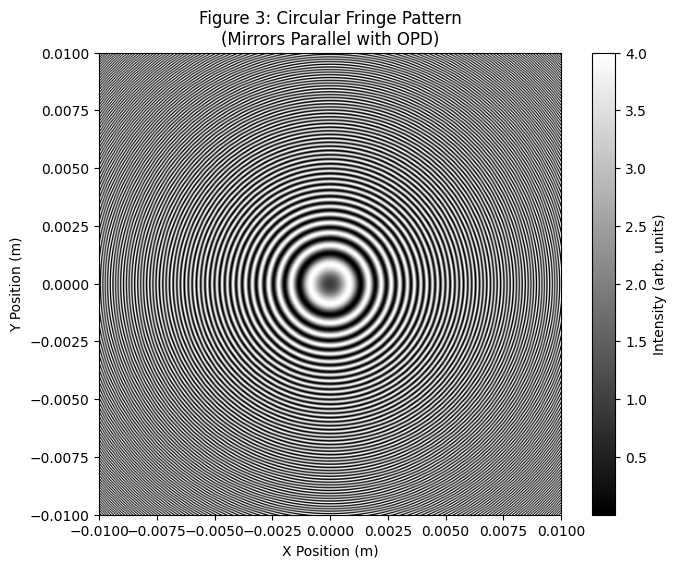

Done.


In [7]:
print("Generating circular fringes...")
circular_pattern = generate_fringe_pattern(30e-6, tilt=False)

plt.figure(figsize=(8, 6))
plt.imshow(circular_pattern, cmap='gray', extent=[-0.01, 0.01, -0.01, 0.01])
plt.colorbar(label='Intensity (arb. units)')
plt.title('Figure 3: Circular Fringe Pattern\n(Mirrors Parallel with OPD)')
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.savefig('figure3_circular_fringes.png', dpi=300, bbox_inches='tight')
plt.show()

print("Done.")